## Introduction

The Department of Education Statistics releases a data set annually containing the percentage of bachelor's degrees granted to women from 1970 to 2012. The data set is broken up into 17 categories of degrees.

This data was compiled to explore the gender gap in STEM fields, which stands for science, technology, engineering, and mathematics. We will attempt to communicate the nuanced narrative of gender gap using effective data visualization. 

Here is a preview of the first few rows:

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
women_degrees.head(4)

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4


## Percentage of Biology Degrees Awarded to Women

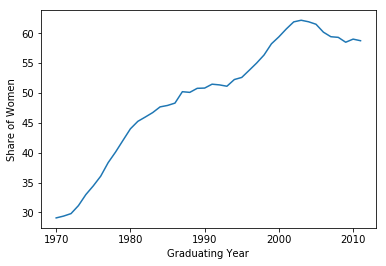

In [2]:
plt.plot(women_degrees['Year'], women_degrees['Biology'])
plt.xlabel("Graduating Year")
plt.ylabel("Share of Women")
plt.show()

From the plot, we can tell that Biology degrees increased steadily from 1970, peaked in the early 2000's and the percentage has stayed above 50% since around 1987. If we want the gender gap to be apparent and emphasized in the plot, we need a visual analogy to the difference in the percentages between the genders.

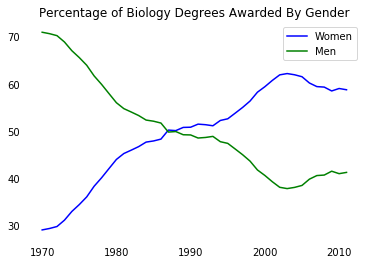

In [3]:
fig, ax = plt.subplots()
ax.plot(women_degrees["Year"], women_degrees["Biology"], c='blue', label="Women")
ax.plot(women_degrees["Year"], 100-women_degrees["Biology"], c='green', label="Men")

ax.tick_params(bottom='off', top='off', left='off', right='off')
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_title("Percentage of Biology Degrees Awarded By Gender")
ax.legend(loc="upper right")

plt.show()

In the first period, from 1970 to around 1987, women were a minority when it came to majoring in Biology while in the second period, from around 1987 to around 2012, women became a majority. You can see the point where women overtook men where the lines intersect.

## Comparing Gender Gap Across STEM Degrees

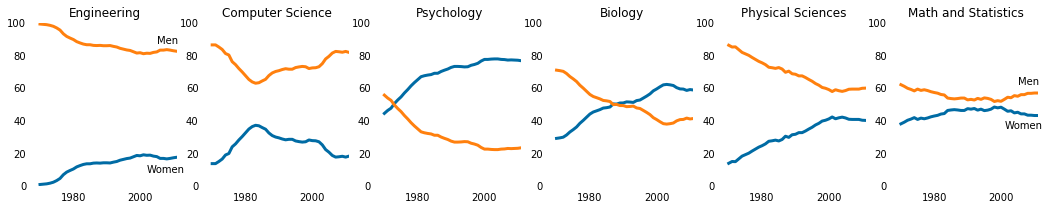

In [4]:
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']
cb_dark_blue = (0/255, 107/255, 164/255)
cb_orange = (255/255, 128/255, 14/255)

fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    if sp == 0:
        ax.text(2005, 87, "Men")
        ax.text(2002, 8, "Women")
    elif sp == 5:
        ax.text(2005, 62, "Men")
        ax.text(2001, 35, "Women")
        
plt.show()

The charts are ordered by descending ending gender gap with Computer Science and Engineering showing the largest gap and little improvement by 2012.
The gap in psychology is almost equally as large as the previous two, but the dominating gender switched early on from men to women.
Biology, Physical Sciences and Math & Statistics show a small ending gender gap, reaching a much more balanced state than the first three degree categories.

## Comparing Gender Gap Across All Degree Categories

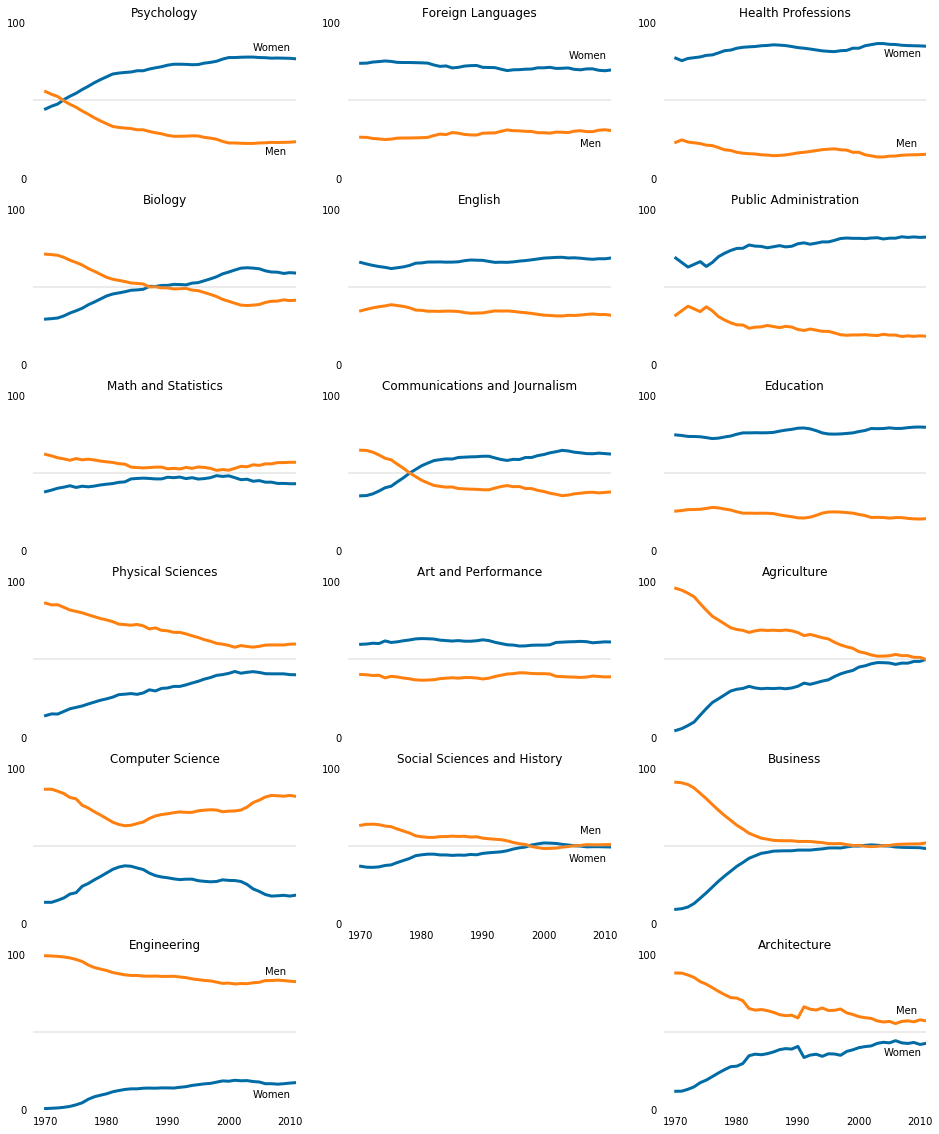

In [5]:
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)

fig = plt.figure(figsize=(16, 20))

## STEM degrees column
for sp in range(0,18,3):
    cat_index = int(sp/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_yticks([0,100])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom="off")
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    ax.set_title(stem_cats[cat_index])
    
    if cat_index == 0:
        ax.text(2006, 15, 'Men')
        ax.text(2004, 82, 'Women')
    elif cat_index == 5:
        ax.text(2006, 87, 'Men')
        ax.text(2004, 8, 'Women')
        ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom="on")

## Liberal Arts degrees column
for sp in range(1,16,3):
    cat_index = int((sp-1)/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_yticks([0,100])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom="off")
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    ax.set_title(lib_arts_cats[cat_index])

    if cat_index == 0:
        ax.text(2006, 20, 'Men')
        ax.text(2004, 77, 'Women')
    elif cat_index == 4:
        ax.text(2006, 58, 'Men')
        ax.text(2004, 40, 'Women')
        ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom="on")

## Other degrees column
for sp in range(2,18,3):
    cat_index = int((sp-2)/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_yticks([0,100])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom="off")
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    ax.set_title(other_cats[cat_index])

    if cat_index == 0:
        ax.text(2006, 20, 'Men')
        ax.text(2004, 78, 'Women')
    elif cat_index == 5:
        ax.text(2006, 62, 'Men')
        ax.text(2004, 35, 'Women')
        ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom="on")

plt.savefig('gender_degrees.png')
plt.show()